#  IMAGE PREPROCESSING

### 1. Import The ImageDataGenerator Library

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

### 2.Configure ImageDataGenerator Class
### Image Data Agumentation

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=2.0,zoom_range=2.0,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

### 3.Apply Image DataGenerator Functionality To Trainset And Testset

### loading our data and performing agumentation

In [11]:
x_train = train_datagen.flow_from_directory(r'C:\Users\gowtham\Downloads\IBM\Dataset\TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')
x_test = train_datagen.flow_from_directory(r'C:\Users\gowtham\Downloads\IBM\Dataset\TEST_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')


Found 4118 images belonging to 5 classes.
Found 1204 images belonging to 5 classes.


### checking the number of classes

In [12]:
print(x_train.class_indices)

print(x_test.class_indices)


from collections import Counter as c
c(x_train.labels)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}
{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


Counter({0: 995, 1: 1354, 2: 1019, 3: 275, 4: 475})

# MODEL BUILDING

### 1.Importing The Model Building Libraries

In [13]:
import numpy as np
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense,Flatten

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout

### 2.Initializing the model

In [14]:
model=Sequential()

### 3.creating the model

In [15]:
## add and initializing CNN(Convolutional Neural Net) layer

classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())

In [16]:
## adding denser layer

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax'))

###  4.summary of our model

In [17]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

### 5.compiling the model

In [18]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### 6.fitting the model

In [19]:
classifier.fit_generator(generator=x_train, steps_per_epoch=len(x_train), 
                        epochs=20, validation_data=x_test, validation_steps=len(x_test))

Epoch 1/20


<ipython-input-19-4cdceec800db>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(generator=x_train, steps_per_epoch=len(x_train),


824/824 [==============================] - 20s 23ms/step - loss: 0.8011 - accuracy: 0.6916 - val_loss: 0.5716 - val_accuracy: 0.7882
Epoch 2/20
824/824 [==============================] - 19s 22ms/step - loss: 0.5725 - accuracy: 0.7814 - val_loss: 0.5153 - val_accuracy: 0.8007
Epoch 3/20
824/824 [==============================] - 19s 23ms/step - loss: 0.5136 - accuracy: 0.8094 - val_loss: 0.5727 - val_accuracy: 0.7849
Epoch 4/20
824/824 [==============================] - 19s 23ms/step - loss: 0.5088 - accuracy: 0.8164 - val_loss: 0.4587 - val_accuracy: 0.8115
Epoch 5/20
824/824 [==============================] - 19s 23ms/step - loss: 0.4510 - accuracy: 0.8283 - val_loss: 0.4394 - val_accuracy: 0.8306
Epoch 6/20
824/824 [==============================] - 19s 23ms/step - loss: 0.4514 - accuracy: 0.8354 - val_loss: 0.4162 - val_accuracy: 0.8480
Epoch 7/20
824/824 [==============================] - 19s 23ms/step - loss: 0.4476 - accuracy: 0.8312 - val_loss: 0.4597 - val_accuracy: 0.8131
Epo

### saving the model

In [20]:
classifier.save('nutrition.h5')

## predicting the result

### importing libraries

In [21]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image


In [22]:
model=load_model('nutrition.h5') ##loading model

In [65]:
# # taking input as an image
from tensorflow.keras.preprocessing import image
img = image.load_img(r'C:\Users\gowtham\Downloads\IBM\sample_images\test5.jpg') ## load image

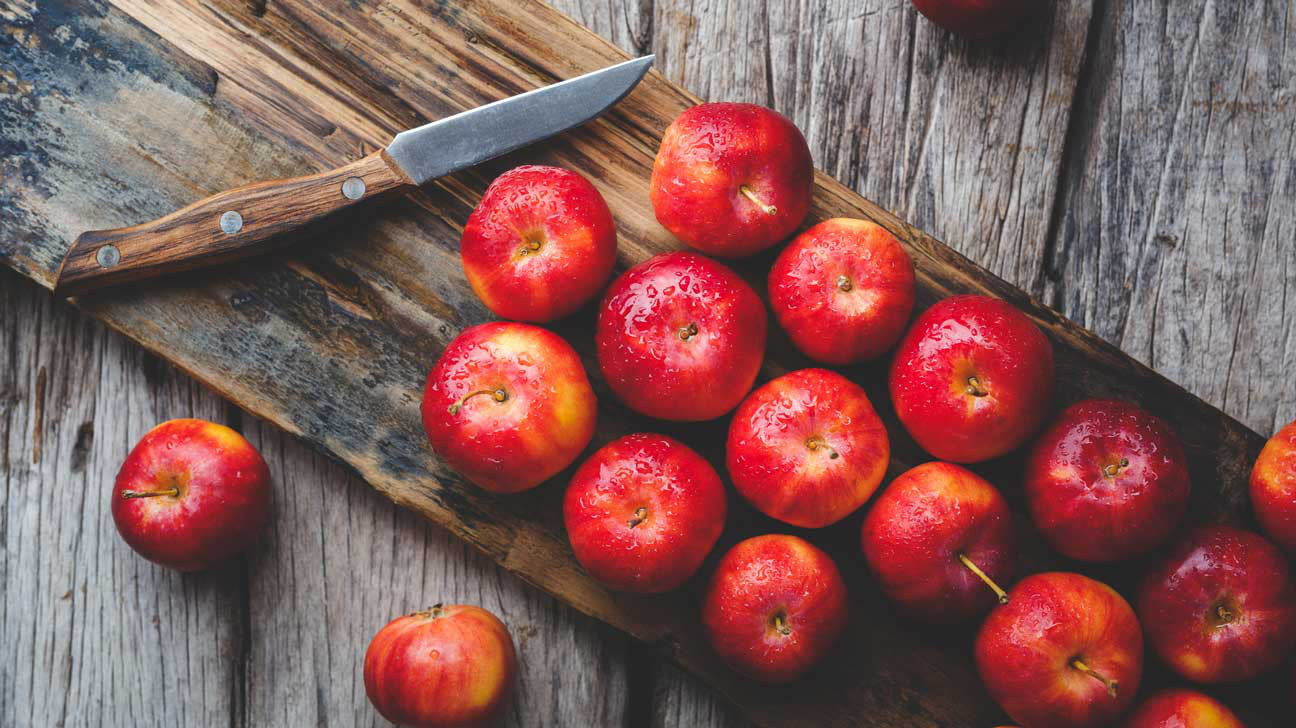

In [66]:
img

### changing the size

In [67]:
img = image.load_img(r'C:\Users\gowtham\Downloads\IBM\sample_images\test5.jpg', grayscale=False, target_size=(64,64))

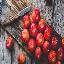

In [68]:
img

### image to array

In [69]:
x = image.img_to_array(img) 
x

array([[[195., 191., 180.],
        [174., 165., 166.],
        [ 54.,  75.,  96.],
        ...,
        [ 88.,  87.,  95.],
        [ 73.,  72.,  77.],
        [131., 138., 146.]],

       [[195., 201., 191.],
        [142., 155., 148.],
        [ 66.,  86.,  97.],
        ...,
        [136., 135., 140.],
        [ 70.,  65.,  61.],
        [ 92.,  90.,  91.]],

       [[115., 102.,  86.],
        [ 49.,  57.,  68.],
        [ 62.,  68.,  84.],
        ...,
        [120., 119., 124.],
        [102.,  97.,  93.],
        [ 65.,  63.,  64.]],

       ...,

       [[138., 148., 157.],
        [134., 138., 141.],
        [175., 182., 188.],
        ...,
        [ 38.,  38.,  38.],
        [ 38.,  38.,  38.],
        [ 39.,  37.,  38.]],

       [[149., 159., 168.],
        [146., 153., 159.],
        [175., 182., 188.],
        ...,
        [ 43.,  43.,  35.],
        [ 38.,  38.,  38.],
        [ 38.,  38.,  38.]],

       [[146., 153., 163.],
        [139., 143., 146.],
        [171., 1

### changing the shape

In [70]:
x = np.expand_dims(x,axis =0) 
x

array([[[[195., 191., 180.],
         [174., 165., 166.],
         [ 54.,  75.,  96.],
         ...,
         [ 88.,  87.,  95.],
         [ 73.,  72.,  77.],
         [131., 138., 146.]],

        [[195., 201., 191.],
         [142., 155., 148.],
         [ 66.,  86.,  97.],
         ...,
         [136., 135., 140.],
         [ 70.,  65.,  61.],
         [ 92.,  90.,  91.]],

        [[115., 102.,  86.],
         [ 49.,  57.,  68.],
         [ 62.,  68.,  84.],
         ...,
         [120., 119., 124.],
         [102.,  97.,  93.],
         [ 65.,  63.,  64.]],

        ...,

        [[138., 148., 157.],
         [134., 138., 141.],
         [175., 182., 188.],
         ...,
         [ 38.,  38.,  38.],
         [ 38.,  38.,  38.],
         [ 39.,  37.,  38.]],

        [[149., 159., 168.],
         [146., 153., 159.],
         [175., 182., 188.],
         ...,
         [ 43.,  43.,  35.],
         [ 38.,  38.,  38.],
         [ 38.,  38.,  38.]],

        [[146., 153., 163.],
       

### prediction process

In [71]:
pred =  np.argmax(model.predict(x_test), axis=-1) 
pred

241/241 [==============================] - 3s 10ms/step


array([0, 3, 1, ..., 0, 3, 1], dtype=int64)

In [72]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [75]:
index=['APPLES', 'BANANA','ORANGE','PINEAPPLE', 'WATERMELON']

# FINAL PREDICTION

In [74]:
index[pred[0]]

'APPLES'